In [1]:
import numpy as np
import sklearn.datasets as d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

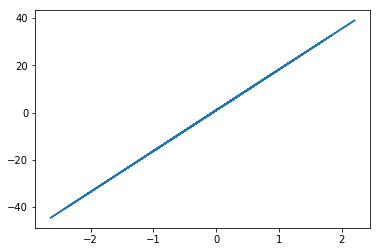

In [2]:
reg_data = d.make_regression(100, 1, 1, 1, 1.0)
plt.plot(reg_data[0], reg_data[1])
plt.show()

<class 'tuple'>


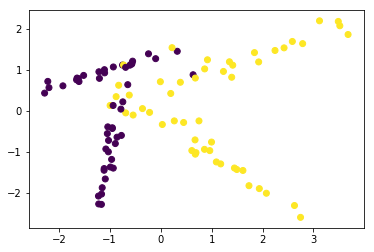

In [3]:
cls_data = d.make_classification(100, 2, 2, 0, 0, 2)
print(type(cls_data))
plt.scatter(cls_data[0][:,0], cls_data[0][:,1], marker='o', c=cls_data[1])
plt.show()

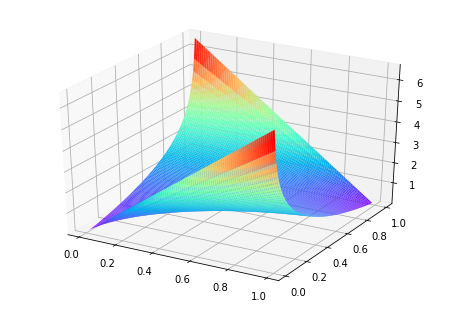

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.linspace(0.01, 0.99, 101)
Y = np.linspace(0.01, 0.99, 101)
X, Y = np.meshgrid(X, Y)
Z = -X * np.log2(Y) - (1 - X) * np.log2(1 - Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

# Gradient Descent

两个函数，三个变量：
1. 待优化函数 f(x)
2. f(x) 的导数 g(x)
3. 变量 x
4. 变量 grad
5. 变量 step

In [5]:
def gradient_descent(x_start, step, g):
    x = x_start
    for i in range(100):
        grad = g(x)
        x -= grad * step
        print('[ Epoch {0} ] grad = {1}, x = {2}'.format(i+1, grad, x))
        if abs(grad) < 1e-6:
            break
    return x

def gd_debug(x_start, step, g):
    x = np.array(x_start, dtype='float64')
    update = np.array([x_start])
    for i in range(1000):
        grad = g(x)
        x -= grad * step
        update = np.append(update, [x], axis = 0)
        print('[ Epoch {0} ] grad = {1}, x = {2}'.format(i+1, grad, x))
        if abs(sum(grad)) < 1e-6:
            break
    return update

In [6]:
def f1(x):
    return x * x - 2 * x + 1

def g1(x):
    return 2 * x - 2

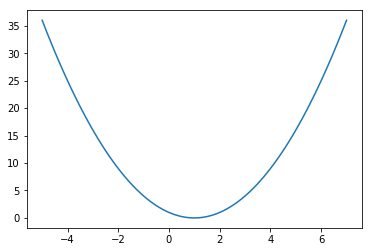

In [9]:
x = np.linspace(-5, 7, 100)
y = f1(x)
plt.plot(x, y)

In [11]:
gradient_descent(5, 0.1, g1)

[ Epoch 1 ] grad = 8, x = 4.2
[ Epoch 2 ] grad = 6.4, x = 3.56
[ Epoch 3 ] grad = 5.12, x = 3.048
[ Epoch 4 ] grad = 4.096, x = 2.6384
[ Epoch 5 ] grad = 3.2767999999999997, x = 2.31072
[ Epoch 6 ] grad = 2.6214399999999998, x = 2.0485759999999997
[ Epoch 7 ] grad = 2.0971519999999995, x = 1.8388607999999997
[ Epoch 8 ] grad = 1.6777215999999995, x = 1.6710886399999998
[ Epoch 9 ] grad = 1.3421772799999996, x = 1.536870912
[ Epoch 10 ] grad = 1.0737418239999998, x = 1.4294967295999998
[ Epoch 11 ] grad = 0.8589934591999997, x = 1.34359738368
[ Epoch 12 ] grad = 0.6871947673599998, x = 1.274877906944
[ Epoch 13 ] grad = 0.5497558138879999, x = 1.2199023255552
[ Epoch 14 ] grad = 0.4398046511103999, x = 1.17592186044416
[ Epoch 15 ] grad = 0.35184372088831983, x = 1.1407374883553278
[ Epoch 16 ] grad = 0.2814749767106557, x = 1.1125899906842622
[ Epoch 17 ] grad = 0.22517998136852446, x = 1.0900719925474098
[ Epoch 18 ] grad = 0.18014398509481966, x = 1.0720575940379278
[ Epoch 19 ] grad

1.0000003369993333

对于函数 $x^2-2x+1$ 而言使用梯度下降进行优化的步长临界值为 1，即小于1才能逐渐收敛；
而对于函数 $4x^2-4x+1$ 而言临界值变成了 0.25.

# Momentum Algorithm

类似于物理上动量的概念，计算过程中，前面优化过程将会积累“能量”并在后续的优化过程中持续发挥作用。

增加一个变量 pre_grad

In [12]:
# numpy 如何添加元素
update = np.array([[1, 2],])
update = np.append(update, [[1, 2]], axis=0)
print(update)

[[1 2]
 [1 2]]


In [13]:
def momentum(x_start, step, g, discount = 0.7):
    x = np.array(x_start, dtype='float64')
    pre_grad = np.zeros_like(x)
    for i in range(1000):
        grad = g(x)
        pre_grad = pre_grad * discount + grad * step
        x -= pre_grad
        print('[ Epoch {0} ] grad = {1}, x = {2}'.format(i+1, grad, x))
        if abs(sum(grad)) < 1e-6:
            break
    return x

def momentum_debug(x_start, step, g, discount = 0.7):
    x = np.array(x_start, dtype='float64')
    update = np.array([x_start])
    pre_grad = np.zeros_like(x)
    for i in range(1000):
        grad = g(x)
        pre_grad = pre_grad * discount + grad * step
        x -= pre_grad
        update = np.append(update, [x], axis = 0)
        print('[ Epoch {0} ] grad = {1}, x = {2}'.format(i+1, grad, x))
        if abs(sum(grad)) < 1e-6:
            break
    return update

In [21]:
def f2(x):
    return x[0] * x[0] + 50 * x[1]* x[1]

def g2(x):
    return np.array([2 * x[0], 100 * x[1]])

def f2_(x):
    return x[0] * x[0] + 50 * x[1]* x[1] - x[0]

def g2_(x):
    return np.array([2 * x[0] - 1, 100 * x[1]])

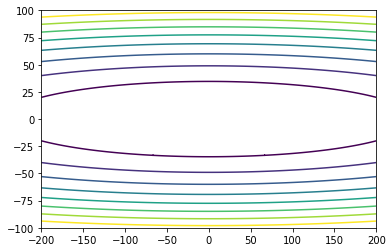

In [15]:
xi = np.linspace(-200, 200, 1000)
yi = np.linspace(-100, 100, 1000)
# 生成网格数据
X, Y = np.meshgrid(xi, yi)
Z = X * X + 50 * Y * Y
# 填充颜色
# plt.contourf(X, Y, Z, 8, alpha = 0.75, cmap = plt.cm.hot)
# 绘制等高线
C= plt.contour(X, Y, Z, 8)
# 等高线数据标签
# plt.clabel(C, inline = True, fontsize = 10)

[ Epoch 1 ] grad = [ 300. 7500.], x = [144.3 -67.5]
[ Epoch 2 ] grad = [  288.6 -6750. ], x = [138.8166  60.75  ]
[ Epoch 3 ] grad = [ 277.6332 6075.    ], x = [133.5415692 -54.675    ]
[ Epoch 4 ] grad = [  267.0831384 -5467.5      ], x = [128.46698957  49.2075    ]
[ Epoch 5 ] grad = [ 256.93397914 4920.75      ], x = [123.58524397 -44.28675   ]
[ Epoch 6 ] grad = [  247.17048793 -4428.675     ], x = [118.8890047  39.858075 ]
[ Epoch 7 ] grad = [ 237.77800939 3985.8075    ], x = [114.37122252 -35.8722675 ]
[ Epoch 8 ] grad = [  228.74244504 -3587.22675   ], x = [110.02511606  32.28504075]
[ Epoch 9 ] grad = [ 220.05023212 3228.504075  ], x = [105.84416165 -29.05653667]
[ Epoch 10 ] grad = [  211.6883233 -2905.6536675], x = [101.82208351  26.15088301]
[ Epoch 11 ] grad = [ 203.64416702 2615.08830075], x = [ 97.95284434 -23.53579471]
[ Epoch 12 ] grad = [  195.90568867 -2353.57947067], x = [94.23063625 21.18221524]
[ Epoch 13 ] grad = [ 188.4612725  2118.22152361], x = [ 90.64987207 -1

[ Epoch 358 ] grad = [ 2.95543881e-04 -3.46447262e-13], x = [1.42156607e-04 3.11802536e-15]
[ Epoch 359 ] grad = [2.84313214e-04 3.11802536e-13], x = [ 1.36754656e-04 -2.80622282e-15]
[ Epoch 360 ] grad = [ 2.73509312e-04 -2.80622282e-13], x = [1.31557979e-04 2.52560054e-15]
[ Epoch 361 ] grad = [2.63115958e-04 2.52560054e-13], x = [ 1.26558776e-04 -2.27304048e-15]
[ Epoch 362 ] grad = [ 2.53117551e-04 -2.27304048e-13], x = [1.21749542e-04 2.04573644e-15]
[ Epoch 363 ] grad = [2.43499084e-04 2.04573644e-13], x = [ 1.17123060e-04 -1.84116279e-15]
[ Epoch 364 ] grad = [ 2.34246119e-04 -1.84116279e-13], x = [1.12672383e-04 1.65704651e-15]
[ Epoch 365 ] grad = [2.25344767e-04 1.65704651e-13], x = [ 1.08390833e-04 -1.49134186e-15]
[ Epoch 366 ] grad = [ 2.16781665e-04 -1.49134186e-13], x = [1.04271981e-04 1.34220768e-15]
[ Epoch 367 ] grad = [2.08543962e-04 1.34220768e-13], x = [ 1.00309646e-04 -1.20798691e-15]
[ Epoch 368 ] grad = [ 2.00619292e-04 -1.20798691e-13], x = [9.64978793e-05 1.08

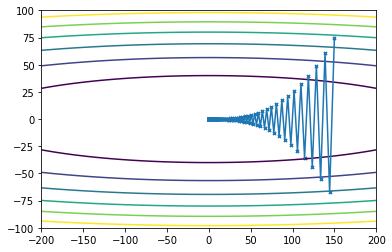

In [16]:
arr = gd_debug([150, 75], 0.019, g2)
plt.scatter(arr[:,0],arr[:,1],s=10,marker='x')
plt.plot(arr[:,0],arr[:,1])
plt.contour(X, Y, Z)

[ Epoch 1 ] grad = [ 300. 7500.], x = [145.2 -45. ]
[ Epoch 2 ] grad = [  290.4 -4500. ], x = [137.1936 -57.    ]
[ Epoch 3 ] grad = [  274.3872 -5700.    ], x = [127.1989248  25.8      ]
[ Epoch 4 ] grad = [ 254.3978496 2580.       ], x = [116.13228657  42.48      ]
[ Epoch 5 ] grad = [ 232.26457313 4248.        ], x = [104.66940663 -13.812     ]
[ Epoch 6 ] grad = [  209.33881327 -1381.2       ], x = [ 93.29596967 -31.1172    ]
[ Epoch 7 ] grad = [  186.59193933 -3111.72      ], x = [82.34909276  6.55668   ]
[ Epoch 8 ] grad = [164.69818552 655.668     ], x = [72.05110796 22.437708  ]
[ Epoch 9 ] grad = [ 144.10221592 2243.7708    ], x = [62.53688314 -2.3459052 ]
[ Epoch 10 ] grad = [ 125.07376629 -234.59052   ], x = [ 53.87574551 -15.94098612]
[ Epoch 11 ] grad = [  107.75149102 -1594.098612  ], x = [46.08892531  0.04803503]
[ Epoch 12 ] grad = [92.17785063  4.8035028 ], x = [39.16330556 11.16349379]
[ Epoch 13 ] grad = [  78.32661113 1116.34937868], x = [33.06214596  1.08272486]
[ 

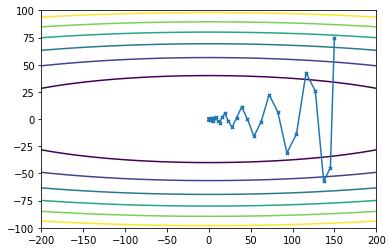

In [17]:
arr = momentum_debug([150, 75], 0.016, g2)
# print(arr)
# plt.plot(arr[:,0])
plt.scatter(arr[:,0],arr[:,1],s=10, marker='x')
plt.plot(arr[:,0],arr[:,1])
plt.contour(X,Y,Z)

# Nesterov Algorithm

与动量算法区别在于，动量算法计算梯度为当前的目标点；Nesterov算法计算的梯度是动量更新后的优化点。

动量算法可以“穿越山谷”，Nesterov算法可以减少抖动程度。

In [18]:
def nesterov(x_start, step, g, discount = 0.7):
    x = np.array(x_start, dtype='float64')
    pre_grad = np.zeros_like(x)
    for i in range(1000):
        # grad = g(x)
        x_future = x - step * discount * pre_grad
        grad = g(x_future)
        pre_grad = pre_grad * discount + grad
        x -= pre_grad * step
        
        print('[ Epoch {0} ] grad = {1}, x = {2}'.format(i+1, grad, x))
        if abs(sum(grad)) < 1e-6:
            break
    return x

def nesterov_debug(x_start, step, g, discount = 0.7):
    x = np.array(x_start, dtype='float64')
    update = np.array([x_start])
    pre_grad = np.zeros_like(x)
    for i in range(1000):
        # grad = g(x)
        x_future = x - step * discount * pre_grad
        grad = g(x_future)
        pre_grad = pre_grad * discount + grad
        x -= pre_grad * step
        update = np.append(update, [x], axis = 0)

        print('[ Epoch {0} ] grad = {1}, x = {2}'.format(i+1, grad, x))
        if abs(sum(grad)) < 1e-6:
            break
    return update

[ Epoch 1 ] grad = [ 300. 7500.], x = [146.4 -15. ]
[ Epoch 2 ] grad = [  287.76 -7800.  ], x = [140.42688  15.6    ]
[ Epoch 3 ] grad = [ 272.491392 3702.      ], x = [132.9757993  -7.404    ]
[ Epoch 4 ] grad = [  255.52008561 -2350.68      ], x = [124.69380178   4.70136   ]
[ Epoch 5 ] grad = [ 237.79280702 1317.5112    ], x = [116.04288983  -2.6350224 ]
[ Epoch 6 ] grad = [ 219.97450293 -777.049008  ], x = [107.34755743   1.55409802]
[ Epoch 7 ] grad = [202.5216495  448.64823072], x = [98.83056496 -0.89729646]
[ Epoch 8 ] grad = [ 185.73734045 -261.32725956], x = [90.63982214  0.52265452]
[ Epoch 9 ] grad = [169.81260433 151.66202055], x = [82.86855092 -0.30332404]
[ Epoch 10 ] grad = [154.85732212 -88.15090333], x = [75.57037319  0.17630181]
[ Epoch 11 ] grad = [140.92329758  51.20399001], x = [68.77056922 -0.10240798]
[ Epoch 12 ] grad = [128.02141287 -29.75048307], x = [6.24744495e+01 5.95009661e-02]
[ Epoch 13 ] grad = [116.13433133  17.28372284], x = [ 5.66735537e+01 -3.456744

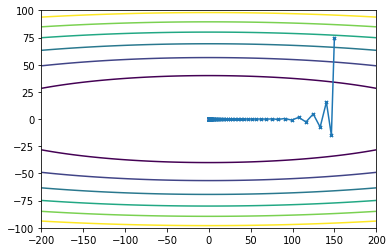

In [127]:
# arr = nesterov_debug([150, 75], 0.015, g2)
arr = nesterov_debug([150, 75], 0.012, g2)
# print(arr)
# plt.plot(arr[:,0])
plt.scatter(arr[:,0],arr[:,1],s=10, marker='x')
plt.plot(arr[:,0],arr[:,1])
plt.contour(X,Y,Z)

# Conjugate gradient method

共轭梯度法属于线搜索的一种。针对特定问题：
$$\min_X\frac{1}{2}X^TAX-b^TX$$
令其导数为0可得，
$$AX^*=b$$

带入前面问题的二维函数 $f(x)=x^2+50y^2+x$ 即可得到：
$$A=\left[
\begin{matrix}
   1 & 0 \\
   0 & 50
\end{matrix}
\right]
 $$
$$b=(1, 0)^T$$
误差变量e

优化方向(Gram-Schmidt方法)和优化步长的确定。
$$\beta_{t,l}=-\frac{d^T_lAu_l}{d^T_lAd_l}$$
$$\alpha_t=\frac{r^T_tg_t}{r^T_tAr_t}$$

baselines中的实现如下：

In [37]:
def conjugate_gradient(f_Ax, b, cg_iters=10, callback=None, verbose=False, residual_tol=1e-10):
    p = b.copy()
    r = b.copy()
    x = np.zeros_like(b)
    rdotr = r.dot(r)
    # print('rdotr:{0}'.format(rdotr))
    for i in range(cg_iters):
        z = f_Ax(p)
        # print(z)
        v = rdotr / p.dot(z)
        x += v * p
        r -= v * z
        newrdotr = r.dot(r)
        mu = newrdotr/rdotr
        p = r + mu * p
        rdotr = newrdotr
        print('[ Epoch {0} ] p = {1}, x = {2}'.format(i+1, p, x))
        if rdotr < residual_tol:
            break
    return x

In [38]:
b = np.array([1.0, 0.0])
conjugate_gradient(g2_, b, verbose=True)
# momentum([150, 75], 0.016, g2_)

[ Epoch 1 ] p = [0. 0.], x = [1. 0.]


array([1., 0.])

问题 为什么使用共轭法解决二维的优化问题，结果不对呢？

# Natural Gradient Descent
自然梯度下降法是对模型的距离进行约束。

$$
\min_{\Delta\omega}f(\omega)+\infty_\omega f(\omega)\Delta\omega \\
s.t.  KL(f(\omega),f(\omega+\Delta\omega))\lt\epsilon
$$